(200, 200) <class 'numpy.ndarray'> [False  True]
[[  0.  141.2]
 [  0.8 142. ]
 [  0.8 143. ]
 ...
 [  0.8 127. ]
 [  0.8 128. ]
 [  0.  128.8]]


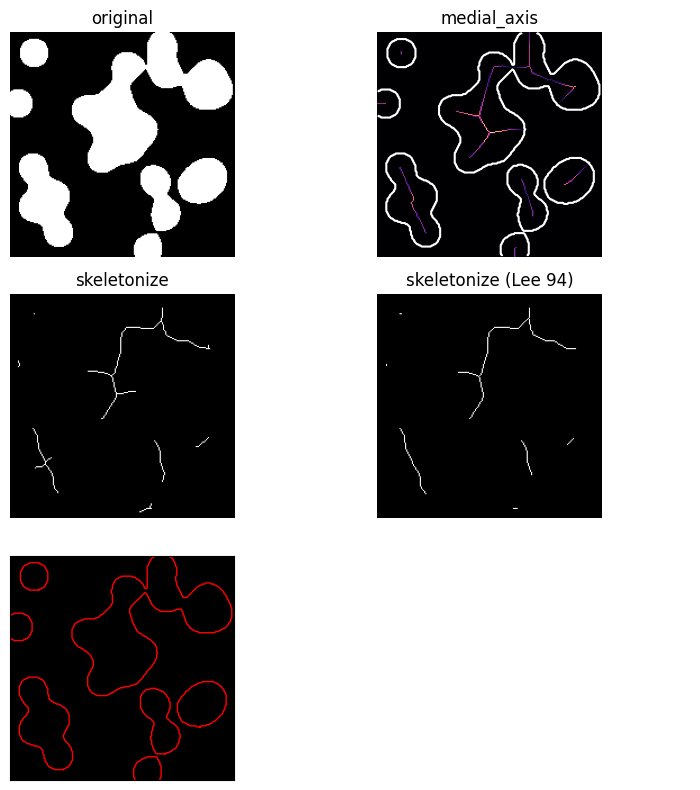

<class 'matplotlib.transforms.Bbox'> Bbox(x0=1.041635472370766, y0=0.14999999999999947, x1=3.2849688057041, y1=2.3933333333333335)


In [8]:
from skimage.morphology import medial_axis, skeletonize
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

# Generate the data
blobs = data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35, seed=2)
print(blobs.shape, type(blobs), np.unique(blobs))   
# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(3, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma')
ax[1].contour(blobs, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')




# 找到轮廓
from skimage.measure import find_contours
from PIL import Image, ImageDraw

# Find contours at a constant value of 0.8
contours = find_contours(blobs, 0.8)
print(contours[0])

# Display the contour
# fig, ax = plt.subplots()
zeros = np.zeros_like(blobs)
zeros_pil = Image.fromarray(zeros)

# for n, contour in enumerate(contours):
#     ImageDraw.Draw(zeros_pil).polygon(contour, outline='red', fill=1)

zeros = np.array(zeros_pil)


ax[4].imshow(zeros, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax[4].plot(contour[:, 1], contour[:, 0], linewidth=1, color='red')

ax[4].axis('image')
ax[4].set_xticks([])
ax[4].set_yticks([])

ax[5].axis('off')

fig.tight_layout()
plt.show()

def save_subfig(fig,ax,fig_name,save_path='./'):
    bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(1.0, 1.0)
    # bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(0, 0)
    extent = bbox.transformed(fig.dpi_scale_trans.inverted())
    print(type(extent), extent)
    fig.savefig(save_path+fig_name, bbox_inches=extent)
    
    
save_subfig(fig,ax[4],'contour.png')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [0]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [  0 255]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


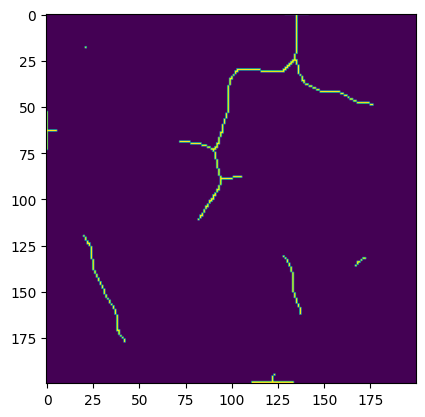

In [26]:
import cv2

# type(blobs)
# blobs为false的变为0，true的变为1
# 0表示背景，1表示前景
blobs_np = np.zeros(blobs.shape).astype(np.uint8)
print(blobs_np, np.unique(blobs_np))
blobs_np[blobs == True] = 255
print(blobs_np, np.unique(blobs_np))

gray_image = blobs_np
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

skeleton_image = cv2.ximgproc.thinning(binary_image)
print(skeleton_image)
plt.imshow(skeleton_image)

In [10]:
from PIL import Image
import numpy as np

contor_dir = '/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/tools/contour.png'
contor_pil = Image.open(contor_dir)
contor_pil_1 = contor_pil#.convert('L')
contor_pil_1_np = np.array(contor_pil_1)
print(contor_pil_1_np.shape, np.unique(contor_pil_1_np))

(224, 224, 4) [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

(1512, 2688) <class 'numpy.ndarray'> [  0 255]
(1512, 2688) <class 'numpy.ndarray'> [  0 255]
(1512, 2688) <class 'numpy.ndarray'> [False  True]
(1512, 2688) <class 'numpy.ndarray'> [  0 255]


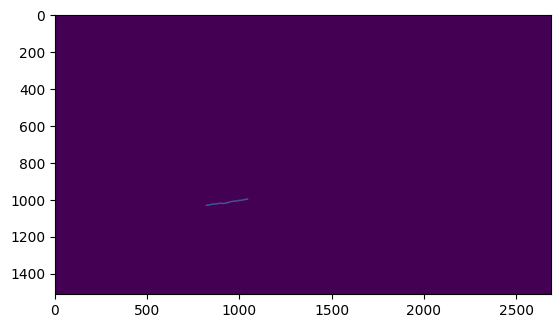

In [12]:
from skimage import io, color, feature, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

mask_name = '0032'
# mask_dir = '/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/output/projection/CFD_044.jpg'
mask_dir = f'/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/datasets/dalian_xinghaiwandaqiao_video_input_rgb/outputs/labelme_outputs/SegmentationClass/{mask_name}.png'

# img = io.imread(mask_dir)
img = Image.open(mask_dir)
img = np.array(img)
# img中不为1的地方为背景，为1的地方为前景
img[img!= 1] = 0
img[img == 1] = 255
print(img.shape, type(img), np.unique(img))
print(img.shape, type(img), np.unique(img))
# img = cv2.GaussianBlur(img, (5, 5), 0)
contour = feature.canny(img, sigma=1.6)
print(contour.shape, type(contour), np.unique(contour))
# print()
# 保存contour
# cv2.imwrite('./contour.jpg', contour)
contour_pil = Image.fromarray(contour).convert('L')
# 将边界变为红色

contour_pil_np = np.array(contour_pil)
print(contour_pil_np.shape, type(contour_pil_np), np.unique(contour_pil_np))
contour_pil.save(f'./contour_{mask_name}.png')

plt.imshow(contour)
plt.show()

# contour_read_pil = Image.open('./contour.jpg')
# contour_read = np.array(contour_read_pil)
# print(contour_read.shape, type(contour_read), np.unique(contour_read))


In [13]:
from skimage import io, color, feature, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import numpy as np
import cv2
from PIL import Image

mask_name = '0032'
# mask_dir = '/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/output/projection/CFD_044.jpg'
mask_dir = f'/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/datasets/dalian_xinghaiwandaqiao_video_input_rgb/outputs/labelme_outputs/SegmentationClass/{mask_name}.png'

# img = io.imread(mask_dir)
img = Image.open(mask_dir)
img = np.array(img)
# img中不为1的地方为背景，为1的地方为前景
img[img!= 1] = 0
img[img == 1] = 255
print(img.shape, type(img), np.unique(img))
print(img.shape, type(img), np.unique(img))
# img = cv2.GaussianBlur(img, (5, 5), 0)
contour = feature.canny(img, sigma=1.6)
print(contour.shape, type(contour), np.unique(contour))
# print()
# 保存contour
# cv2.imwrite('./contour.jpg', contour)
contour_pil = Image.fromarray(contour).convert('L')
# 将边界变为红色

contour_pil_np = np.array(contour_pil)

# 创建一个与原图像相同大小的全黑彩色图像
red_contour = np.zeros((contour.shape[0], contour.shape[1], 3), dtype=np.uint8)

# 将边界位置对应的像素设置为红色
red_contour[contour] = [0, 0, 255]

# 保存红色边界图像
cv2.imwrite(f'./red_contour_{mask_name}.png', red_contour)

# 显示红色边界图像（可选）
cv2.imshow('Red Contour', red_contour)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1512, 2688) <class 'numpy.ndarray'> [  0 255]
(1512, 2688) <class 'numpy.ndarray'> [  0 255]
(1512, 2688) <class 'numpy.ndarray'> [False  True]


In [14]:
contour_read_pil = Image.open(f'./red_contour_{mask_name}.png')
contour_read = np.array(contour_read_pil)
print(contour_read.shape, type(contour_read), np.unique(contour_read))

(1512, 2688, 3) <class 'numpy.ndarray'> [  0 255]


P (1512, 2688) [0 1 2]
L (1512, 2688) [False  True]
(1512, 2688) <class 'numpy.ndarray'> [False  True]
skel shape: (1512, 2688) distance shape: (1512, 2688)
max dist_on_skel: 46.861498055439924  pixels
max dist_on_skel_lee: 46.861498055439924  pixels
max dist_on_skel_zhang: 46.69047011971501  pixels
(array([786]), array([1356]))
max_dist_on_skel_lee_index: (786, 1356)
distance.shape: (1512, 2688)
skel.shape: (1512, 2688)
dist_on_skel.shape: (1512, 2688)


/tmp/ipykernel_468019/4188194473.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('max_dist_on_skel_lee_index:', (int(max_dist_on_skel_lee_index[0]), int(max_dist_on_skel_lee_index[1])))
/tmp/ipykernel_468019/4188194473.py:100: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dist_on_skel_lee = cv2.circle(dist_on_skel_lee, (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), 5, (np.max(dist_on_skel_lee), 0, 0), -1)


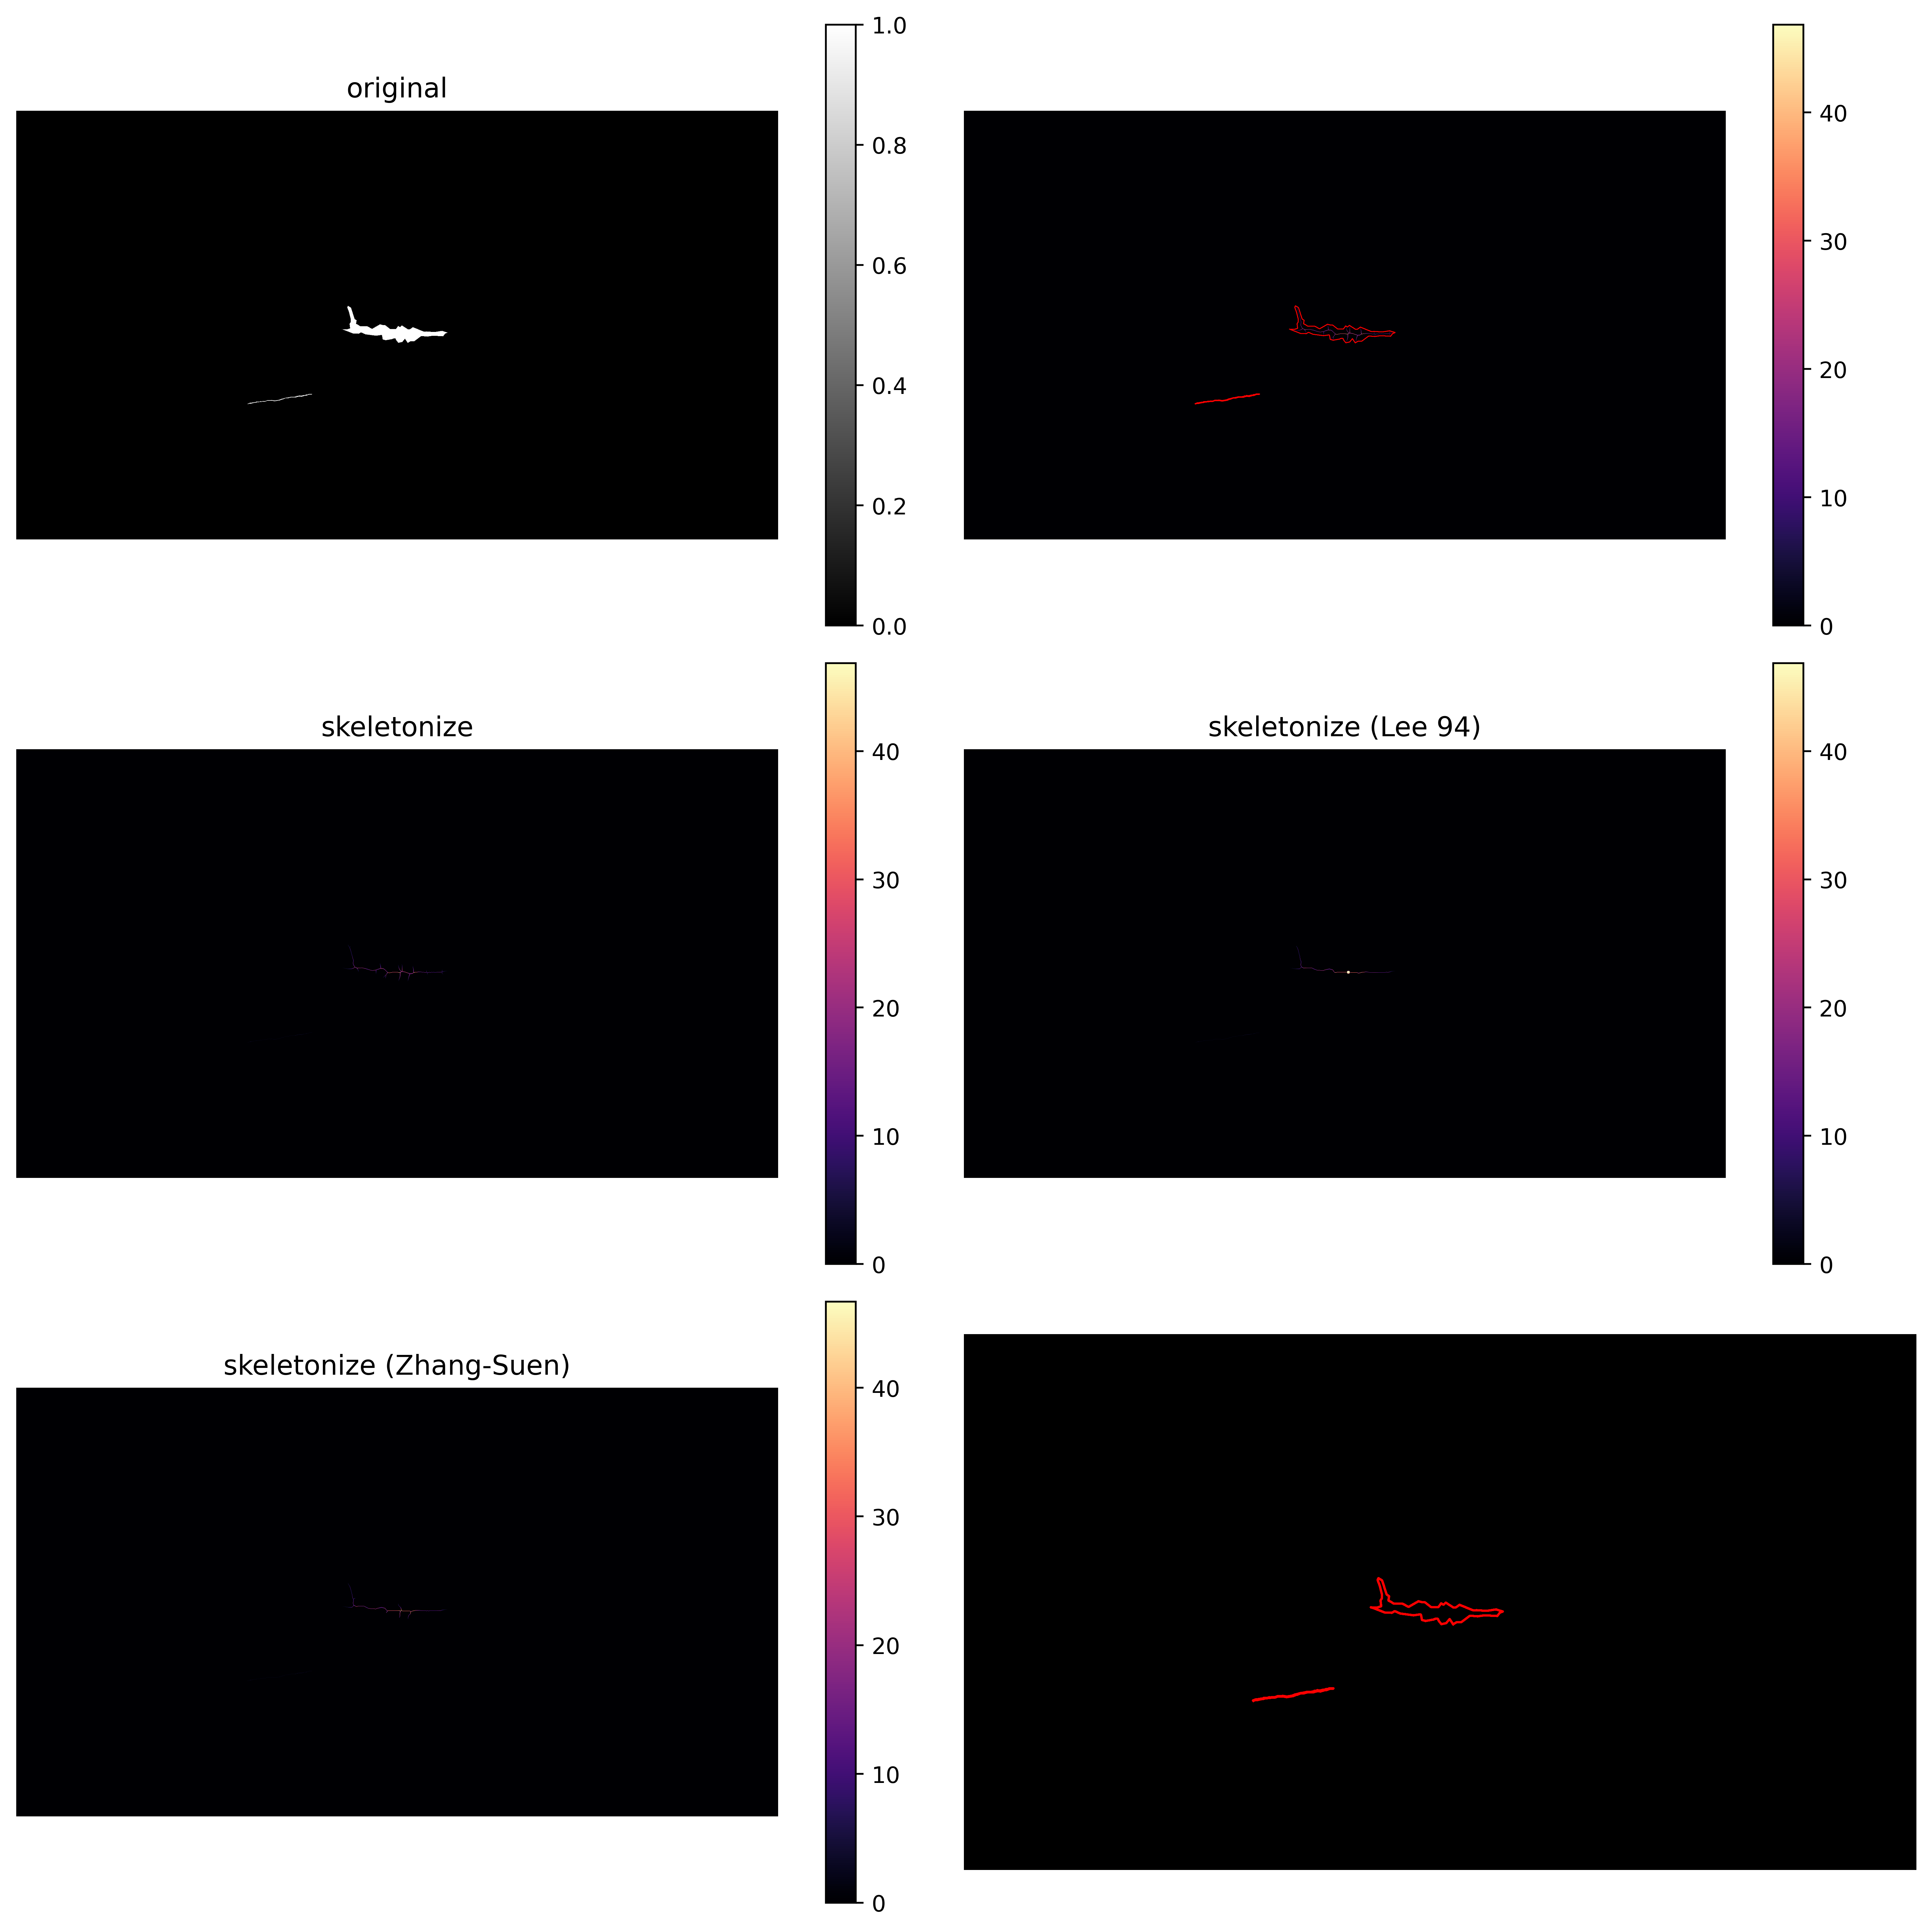

<class 'matplotlib.transforms.Bbox'> Bbox(x0=5.985006833036246, y0=0.43213733845811314, x1=11.85, y1=3.7311959948752254)


In [38]:
# 整体图片处理流程：

from skimage.morphology import medial_axis, skeletonize
from skimage import data
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
# import io

def save_subfig(fig,ax,fig_name,save_path='./'):
    bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(1.0, 1.0)
    # bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(0, 0)
    extent = bbox.transformed(fig.dpi_scale_trans.inverted())
    print(type(extent), extent)
    fig.savefig(save_path+fig_name, bbox_inches=extent)
        
# 原文链接：https://blog.csdn.net/qq_39645262/article/details/127190982

# img_name = 'CFD_044'
# path ='/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/output/projection/CFD_044.jpg'
# # path  = rf"D:\project\code\tool_use-main\crack.png"

img_name = '0032'
# mask_dir = '/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/output/projection/CFD_044.jpg'
path = f'/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/datasets/dalian_xinghaiwandaqiao_video_input_rgb/outputs/labelme_outputs/SegmentationClass/{mask_name}.png'

# cls_num = 2
cls_num = 'all'

# image = io.imread(path, as_gray=True)
# image = Image.open(path, mode='r')
# image_np = np.array(image)

# print(image.mode, image_np.shape, np.unique(image_np))
img_pil = Image.open(mask_dir)
img = np.array(img_pil)
print(img_pil.mode, img.shape, np.unique(img))
# img中不为1的地方为背景，为1的地方为前景
if type(cls_num) == int:
    img[img!= cls_num] = 0
    img[img == cls_num] = 255
elif cls_num == 'all':
    img[img!= 0] = 255
    img[img == 0] = 0
else:
    print('cls_num error')


img_pil_new = Image.fromarray(img)
image = img_pil_new.convert('1')
blobs= np.array(image)
print(img_pil_new.mode, blobs.shape, np.unique(blobs))


h, w = blobs.shape

# Generate the data
# blobs = data.binary_blobs(200, blob_size_fraction=.2,
#                           volume_fraction=.35, seed=2)
print(blobs.shape, type(blobs), np.unique(blobs))   
# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)
print('skel shape:', skel.shape, 'distance shape:', distance.shape)
# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')
skeleton_zhang = skeletonize(blobs, method='zhang')
# print(skeleton_lee.shape)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel *2
dist_on_skel_lee = (distance * skeleton_lee / 255) * 2
dist_on_skel_zhang = distance * skeleton_zhang * 2


print('max dist_on_skel:', np.max(dist_on_skel), ' pixels')
print('max dist_on_skel_lee:', np.max(dist_on_skel_lee), ' pixels')
print('max dist_on_skel_zhang:', np.max(dist_on_skel_zhang), ' pixels')

# 找到dist_on_skel_lee中最大值对应的坐标
max_dist_on_skel_lee = np.max(dist_on_skel_lee)
max_dist_on_skel_lee_index = np.where(dist_on_skel_lee == max_dist_on_skel_lee)
print(max_dist_on_skel_lee_index)
if len(max_dist_on_skel_lee_index[0]) > 1:
    for i in range(len(max_dist_on_skel_lee_index[0])):
        print('max_dist_on_skel_lee_index:', (int(max_dist_on_skel_lee_index[0][i]), int(max_dist_on_skel_lee_index[1][i])))
        # 在dist_on_skel_lee上画出最大值对应的坐标，用圆形标记
        # dist_on_skel_lee = np.zeros_like(dist_on_skel_lee)
        dist_on_skel_lee = cv2.circle(dist_on_skel_lee, (int(max_dist_on_skel_lee_index[1][i]), int(max_dist_on_skel_lee_index[0][i])), 5, (np.max(dist_on_skel_lee), 0, 0), -1)
        # 在dist_on_skel_lee上标记坐标值
        # dist_on_skel_lee = cv2.putText(dist_on_skel_lee, str((int(max_dist_on_skel_lee_index[1][i]), int(max_dist_on_skel_lee_index[0][i]))) + ' ' +str(round(max_dist_on_skel_lee, 2)), (int(max_dist_on_skel_lee_index[1][i]), int(max_dist_on_skel_lee_index[0][i])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (np.max(dist_on_skel_lee), np.max(dist_on_skel_lee), np.max(dist_on_skel_lee)), 1, cv2.LINE_AA)
        # dist_on_skel_lee[max_dist_on_skel_lee_index] = 1
        
else:
        
    print('max_dist_on_skel_lee_index:', (int(max_dist_on_skel_lee_index[0]), int(max_dist_on_skel_lee_index[1])))
    # 在dist_on_skel_lee上画出最大值对应的坐标，用圆形标记
    # dist_on_skel_lee = np.zeros_like(dist_on_skel_lee)
    dist_on_skel_lee = cv2.circle(dist_on_skel_lee, (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), 5, (np.max(dist_on_skel_lee), 0, 0), -1)
    # 在dist_on_skel_lee上标记坐标值
    # dist_on_skel_lee = cv2.putText(dist_on_skel_lee, str((int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0]))) + ' ' +str(round(max_dist_on_skel_lee, 2)), (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (np.max(dist_on_skel_lee), np.max(dist_on_skel_lee), np.max(dist_on_skel_lee)), 1, cv2.LINE_AA)
    # dist_on_skel_lee[max_dist_on_skel_lee_index] = 1

# # max_dist_on_skel_lee保留2位小数
# max_dist_on_skel_lee = round(max_dist_on_skel_lee, 2)

print('distance.shape:', distance.shape)
print('skel.shape:', skel.shape)
print('dist_on_skel.shape:', dist_on_skel.shape)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True, dpi=500)
# fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True, dpi=w//6)
# fig, axes = plt.subplots(3, 2, sharex=True, sharey=True)
ax = axes.ravel()

dist_on_skel_cax0 = ax[0].imshow(blobs, cmap=plt.cm.gray)
fig.colorbar(dist_on_skel_cax0, ax=ax[0])
ax[0].set_title('original')
ax[0].axis('off')

dist_on_skel_cax1 = ax[1].imshow(dist_on_skel, cmap='magma')
fig.colorbar(dist_on_skel_cax1, ax=ax[1])
ax[1].contour(blobs, [0.5], colors='r', linewidths=0.4) # 0.5 is the threshold
# ax[1].contour(blobs, [0.5], colors='w', linewidths=1.0)
# ax[1].set_title('medial_axis')
ax[1].axis('off')

# ax[2].imshow(skeleton, cmap=plt.cm.gray)
dist_on_skel_cax2 = ax[2].imshow(dist_on_skel, cmap='magma')
fig.colorbar(dist_on_skel_cax2, ax=ax[2])
ax[2].set_title('skeletonize')
ax[2].axis('off')

# ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
dist_on_skel_cax3 = ax[3].imshow(dist_on_skel_lee, cmap='magma')
fig.colorbar(dist_on_skel_cax3, ax=ax[3])
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

# ax[4].imshow(skeleton_zhang, cmap=plt.cm.gray)
dist_on_skel_cax4 = ax[4].imshow(dist_on_skel_zhang, cmap='magma')
fig.colorbar(dist_on_skel_cax4, ax=ax[4])
ax[4].set_title("skeletonize (Zhang-Suen)")
ax[4].axis('off')

# ax[5].imshow(image_np, cmap='gray')
# ax[5].set_title('original')


#################################################################
# 找到轮廓
from skimage.measure import find_contours
from PIL import Image, ImageDraw

# Find contours at a constant value of 0.8
contours = find_contours(blobs, 0.8)
# print(contours[0])

# Display the contour
# fig, ax = plt.subplots()
zeros = np.zeros_like(blobs)
zeros_pil = Image.fromarray(zeros)

# for n, contour in enumerate(contours):
#     ImageDraw.Draw(zeros_pil).polygon(contour, outline='red', fill=1)

zeros = np.array(zeros_pil)


dist_on_skel_cax5 =ax[5].imshow(zeros, cmap=plt.cm.gray)
# fig.colorbar(dist_on_skel_cax5, ax=ax[5])

for n, contour in enumerate(contours):
    ax[5].plot(contour[:, 1], contour[:, 0], linewidth=1, color='red')
ax[5].axis('off')

fig.tight_layout()
# fig.savefig(f'skeletonization_{img_name}.png')
plt.show()
fig.savefig(f'all_{img_name}_cls_num_{cls_num}.png')
save_subfig(fig, ax[5], f'boundary_{img_name}_medial_axis_cls_num_{cls_num}.png')

mask_image.shape: (1512, 2688) [ 0 38 75]
连通区域的个数(包含背景)为: 4
连通区域的标签为: (1512, 2688) [0 1 2 3]
mask的个数(含有少量孤立点)为: 3
np.unique(single_mask): [0 1]
mask=1的非零的数量为: 11851
single_mask_new.shape: (1512, 2688) [0 1]


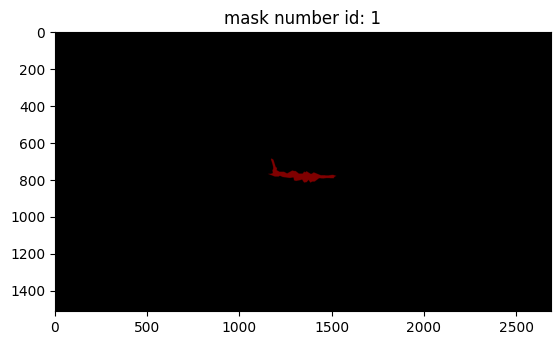

np.unique(single_mask): [0 2]
mask=2的非零的数量为: 1
np.unique(single_mask): [0 3]
mask=3的非零的数量为: 526
single_mask_new.shape: (1512, 2688) [0 3]


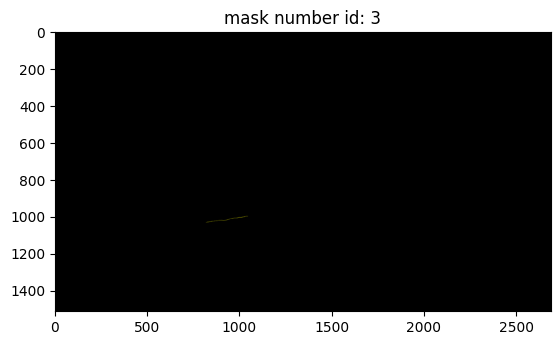

mask的个数(去除含有少量孤立点)为: 2, 去除的mask的label为: [2]


In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imgviz


def colored_mask(mask, save_path=None):
    lbl_pil = Image.fromarray(mask.astype(np.uint8), mode="P")
    colormap = imgviz.label_colormap()
    # print(colormap, type(colormap), colormap.flatten(), colormap.shape)
    lbl_pil.putpalette(colormap.flatten())
    if save_path is not None:
        lbl_pil.save(save_path)

    return lbl_pil  

# mask_dir = '/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/tools/boundary_0032_medial_axis_cls_num_all.png'
mask_dir = '/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/datasets/dalian_xinghaiwandaqiao_video_input_rgb/outputs/labelme_outputs/SegmentationClass/0032.png'
# # 读取二值mask图像
mask_image = cv2.imread(mask_dir, cv2.IMREAD_GRAYSCALE)
print('mask_image.shape:', mask_image.shape, np.unique(mask_image))
# 进行连通区域分析
num_labels, labels = cv2.connectedComponents(mask_image)
print(f"连通区域的个数(包含背景)为: {num_labels}")
print(f"连通区域的标签为: {labels.shape}", np.unique(labels))   
# 统计mask的个数（减去背景）
mask_count = num_labels - 1

print(f"mask的个数(含有少量孤立点)为: {mask_count}")

###################################################################
cls_num_mask_dict = {}



# image = io.imread(path, as_gray=True)
# image = Image.open(path, mode='r')
# image_np = np.array(image)

# print(image.mode, image_np.shape, np.unique(image_np))

    
less_than_10_mask_count = []
# 为每个mask编号（从1开始，因为0通常代表背景）
for label in range(1, num_labels):
    # single_mask = np.uint8(labels == label) * 255
    # single_mask 分别代表不同label的mask,保持与原label数值一致
    single_mask = np.zeros(mask_image.shape, dtype=np.uint8)
    single_mask[labels == label] = label
    
    single_mask_pil = colored_mask(single_mask)
    single_mask = np.array(single_mask_pil)
    
    print('np.unique(single_mask):', np.unique(single_mask))
    # 计算single_mask的非零的数量
    non_zero_count = np.count_nonzero(single_mask)
    print(f"mask={label}的非零的数量为: {non_zero_count}")
    if non_zero_count < 10:
        less_than_10_mask_count.append(label)
        mask_count -= 1
        # single_mask[labels == label] = label
        # print('更新后的np.unique(single_mask):', np.unique(single_mask))
        continue 
    else:
        single_mask_new = single_mask.copy()
        print('single_mask_new.shape:', single_mask_new.shape, np.unique(single_mask_new))
    # 这里可以对单个mask进行进一步处理，比如保存图像
    # cv2.imwrite(f'mask_{label}.png', single_mask)
    # cv2.imshow(f'mask_{label}', single_mask)
    # cv2.waitKey(0)
    plt.title(f'mask number id: {label}')
    plt.imshow(single_mask_pil)
    # single_mask_pil.save(f'mask_{label}.png')
    plt.show()
print(f"mask的个数(去除含有少量孤立点)为: {mask_count}, 去除的mask的label为: {less_than_10_mask_count}")

# cv2.destroyAllWindows()

# 每个类别的每个独立损伤的骨架和最大宽度计算： 按1,2,3类别分类损伤，保存不同损伤类型对应的mask到字典：

dict = {1:[array(mask1), array(mask2), array(mask3)], 2:[array(mask2)], 3:[array(mask3)]} [这样即有类别，又有每个类别对应的mask]

P (1512, 2688) [0 1 2]
cls_num_list: [0, 1, 2]
############ cls_num #############: 0
cls_num=0为背景，跳过
############ cls_num #############: 1
连通区域的个数(包含背景)为: 2
连通区域的标签为: (1512, 2688) [0 1]
mask的个数(含有少量孤立点)为: 1
np.unique(single_mask): [0 1]
single_mask_new.shape: (1512, 2688) [0 1]


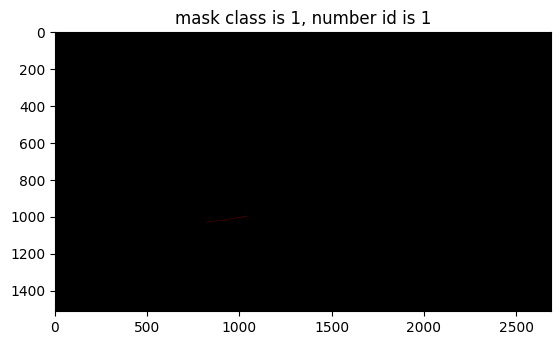

L (1512, 2688) [False  True]
blobs.shape, type(blobs), np.unique(blobs): (1512, 2688) <class 'numpy.ndarray'> [False  True]
skel shape: (1512, 2688) distance shape: (1512, 2688)
cls_num=1, label=1, max dist_on_skel_lee: 4.0  pixels
############# max_dist_on_skel_lee_index ############# : (1002, 1023)
############# max_dist_on_skel_lee_index ############# : (1002, 1024)
############# max_dist_on_skel_lee_index ############# : (1002, 1025)
############# max_dist_on_skel_lee_index ############# : (1003, 1021)
############# max_dist_on_skel_lee_index ############# : (1003, 1022)
############# max_dist_on_skel_lee_index ############# : (1004, 1014)
############# max_dist_on_skel_lee_index ############# : (1004, 1015)
############# max_dist_on_skel_lee_index ############# : (1005, 1010)
############# max_dist_on_skel_lee_index ############# : (1005, 1011)
############# max_dist_on_skel_lee_index ############# : (1005, 1012)
############# max_dist_on_skel_lee_index ############# : (1006, 997)

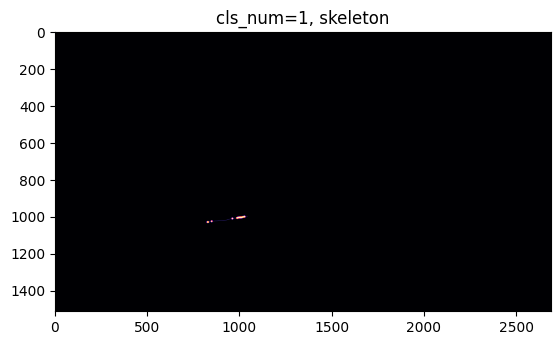

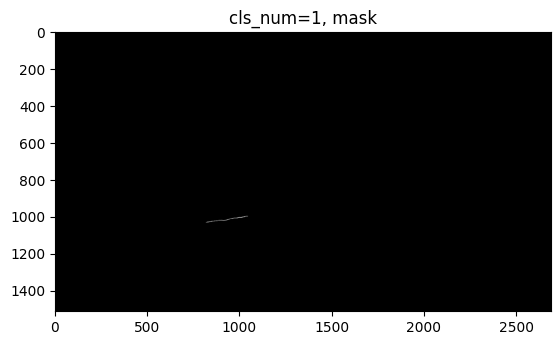

mask的个数(去除含有少量孤立点)为: 1, 去除的mask的label为: []
############ cls_num #############: 2
连通区域的个数(包含背景)为: 3
连通区域的标签为: (1512, 2688) [0 1 2]
mask的个数(含有少量孤立点)为: 2
np.unique(single_mask): [0 1]
single_mask_new.shape: (1512, 2688) [0 1]


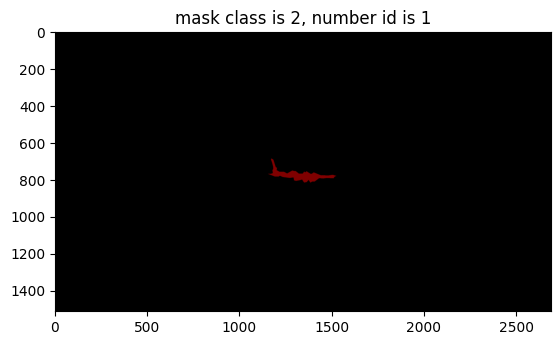

L (1512, 2688) [False  True]
blobs.shape, type(blobs), np.unique(blobs): (1512, 2688) <class 'numpy.ndarray'> [False  True]
skel shape: (1512, 2688) distance shape: (1512, 2688)
cls_num=2, label=1, max dist_on_skel_lee: 46.861498055439924  pixels
############# max_dist_on_skel_lee_index #############: (786, 1356)
distance.shape: (1512, 2688)
skel.shape: (1512, 2688)
np.unique(single_mask): [0 2]


/tmp/ipykernel_509134/2256870089.py:152: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('############# max_dist_on_skel_lee_index #############:', (int(max_dist_on_skel_lee_index[0]), int(max_dist_on_skel_lee_index[1])))
/tmp/ipykernel_509134/2256870089.py:155: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dist_on_skel_lee = cv2.circle(dist_on_skel_lee, (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), 5, (np.max(dist_on_skel_lee), 0, 0), -1)


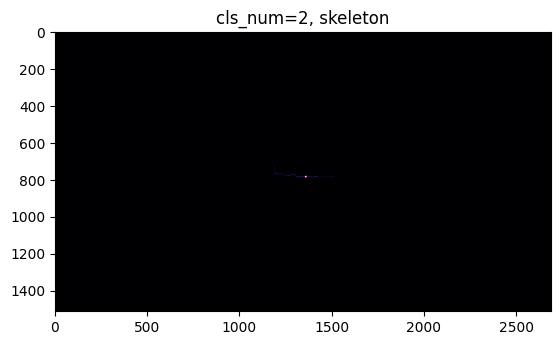

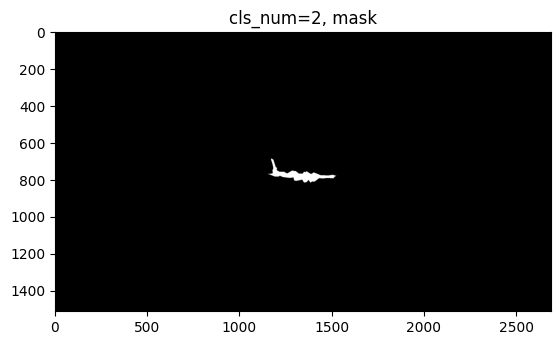

mask的个数(去除含有少量孤立点)为: 1, 去除的mask的label为: [2]


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imgviz
from PIL import Image
from skimage.morphology import medial_axis, skeletonize


def colored_mask(mask, save_path=None):
    lbl_pil = Image.fromarray(mask.astype(np.uint8), mode="P")
    colormap = imgviz.label_colormap()
    # print(colormap, type(colormap), colormap.flatten(), colormap.shape)
    lbl_pil.putpalette(colormap.flatten())
    if save_path is not None:
        lbl_pil.save(save_path)

    return lbl_pil  

img_name = '0032'
# mask_dir = '/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/tools/boundary_0032_medial_axis_cls_num_all.png'
mask_dir = f'/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/datasets/dalian_xinghaiwandaqiao_video_input_rgb/outputs/labelme_outputs/SegmentationClass/{img_name}.png'
# # 读取二值mask图像
# mask_image = cv2.imread(mask_dir, cv2.IMREAD_GRAYSCALE)


###################################################################
cls_num_mask_dict = {img_name: {}}
cls_num_skel_dict = {img_name: {}}  # 每个类别的每个骨架
cls_num_skel_all_dict = {img_name: {}} # 每个类别的骨架相加




# image = io.imread(path, as_gray=True)
# image = Image.open(path, mode='r')
# image_np = np.array(image)

# print(image.mode, image_np.shape, np.unique(image_np))
mask_pil = Image.open(mask_dir)
mask_image = np.array(mask_pil)
print(mask_pil.mode, mask_image.shape, np.unique(mask_image))
cls_num_list = np.unique(mask_image).tolist()
print(f"cls_num_list: {cls_num_list}")
# img中不为1的地方为背景，为1的地方为前景
# if type(cls_num) == int:
#     img[img!= cls_num] = 0
#     img[img == cls_num] = 255
# elif cls_num == 'all':
#     img[img!= 0] = 255
#     img[img == 0] = 0
# else:
#     print('cls_num error')

# 按照类别数目进行循环
###################### 语义分类 #################################
for cls_num in cls_num_list:
    print(f"############ cls_num #############: {cls_num}")
    
    if cls_num == 0:
        print(f"cls_num={cls_num}为背景，跳过")
        continue
    # 按照类别进行连同区域的提取
    # 进行连通区域分析
    # 提取类别的mask范围
    cls_num_mask_dict[img_name][cls_num] = []
    cls_num_skel_dict[img_name][cls_num] = []
    cls_num_skel_all_dict[img_name][cls_num] = []
    
    
    cls_num_mask = mask_image.copy()
    cls_num_mask[cls_num_mask != cls_num] = 0
    
    num_labels, labels = cv2.connectedComponents(cls_num_mask)
    print(f"连通区域的个数(包含背景)为: {num_labels}")
    print(f"连通区域的标签为: {labels.shape}", np.unique(labels))   
    # 统计mask的个数（减去背景）
    mask_count = num_labels - 1

    print(f"mask的个数(含有少量孤立点)为: {mask_count}")
        
    less_than_10_mask_count = []
    # 为每个mask编号（从1开始，因为0通常代表背景）
    ############################# 基于语义分类的实例分类 ################################
    for label in range(1, num_labels):
        # single_mask = np.uint8(labels == label) * 255
        # single_mask 分别代表不同label的mask,保持与原label数值一致
        single_mask = np.zeros(cls_num_mask.shape, dtype=np.uint8)
        single_mask[labels == label] = label
        
        single_mask_pil = colored_mask(single_mask)
        single_mask = np.array(single_mask_pil)
        
        print('np.unique(single_mask):', np.unique(single_mask))
        # 计算single_mask的非零的数量
        non_zero_count = np.count_nonzero(single_mask)
        # print(f"mask={label}的非零的数量为: {non_zero_count}")
        if non_zero_count < 10:
            less_than_10_mask_count.append(label)
            mask_count -= 1
            # single_mask[labels == label] = label
            # print('更新后的np.unique(single_mask):', np.unique(single_mask))
            continue 
        else:
            single_mask_new = single_mask.copy()
            cls_num_mask_dict[img_name][cls_num].append(single_mask_new)
            print('single_mask_new.shape:', single_mask_new.shape, np.unique(single_mask_new))
        # 这里可以对单个mask进行进一步处理，比如保存图像
        # cv2.imwrite(f'mask_{label}.png', single_mask)
        # cv2.imshow(f'mask_{label}', single_mask)
        # cv2.waitKey(0)
        plt.title(f'mask class is {cls_num}, number id is {label}')
        plt.imshow(single_mask_pil)
        # single_mask_pil.save(f'mask_{label}.png')
        plt.show()
        
        # 每个单独的损伤label的骨架提取计算最大宽度
        single_mask_new_copy = single_mask.copy()
        # if type(cls_num) == int:
        single_mask_new_copy[single_mask_new_copy!= label] = 0
        single_mask_new_copy[single_mask_new_copy == label] = 255
        
        img_pil_new = Image.fromarray(single_mask_new_copy)
        image = img_pil_new.convert('1')
        blobs= np.array(image)
        print(img_pil_new.mode, blobs.shape, np.unique(blobs))
        
        print('blobs.shape, type(blobs), np.unique(blobs):', blobs.shape, type(blobs), np.unique(blobs))   
        # Compute the medial axis (skeleton) and the distance transform
        skel, distance = medial_axis(blobs, return_distance=True)
        print('skel shape:', skel.shape, 'distance shape:', distance.shape)
        
        skeleton_lee = skeletonize(blobs, method='lee')
        dist_on_skel_lee = (distance * skeleton_lee / 255) * 2
        print(f'cls_num={cls_num}, label={label}, max dist_on_skel_lee:', np.max(dist_on_skel_lee), ' pixels')
        
        # 找到dist_on_skel_lee中最大值对应的坐标
        max_dist_on_skel_lee = np.max(dist_on_skel_lee)
        max_dist_on_skel_lee_index = np.where(dist_on_skel_lee == max_dist_on_skel_lee)
        
        if len(max_dist_on_skel_lee_index[0]) > 1:
            for i in range(len(max_dist_on_skel_lee_index[0])):
                print('############# max_dist_on_skel_lee_index ############# :', (int(max_dist_on_skel_lee_index[0][i]), int(max_dist_on_skel_lee_index[1][i])))
                # 在dist_on_skel_lee上画出最大值对应的坐标，用圆形标记
                # dist_on_skel_lee = np.zeros_like(dist_on_skel_lee)
                dist_on_skel_lee = cv2.circle(dist_on_skel_lee, (int(max_dist_on_skel_lee_index[1][i]), int(max_dist_on_skel_lee_index[0][i])), 5, (np.max(dist_on_skel_lee), 0, 0), -1)
                # 在dist_on_skel_lee上标记坐标值
                # dist_on_skel_lee = cv2.putText(dist_on_skel_lee, str((int(max_dist_on_skel_lee_index[1][i]), int(max_dist_on_skel_lee_index[0][i]))) + ' ' +str(round(max_dist_on_skel_lee, 2)), (int(max_dist_on_skel_lee_index[1][i]), int(max_dist_on_skel_lee_index[0][i])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (np.max(dist_on_skel_lee), np.max(dist_on_skel_lee), np.max(dist_on_skel_lee)), 1, cv2.LINE_AA)
                # dist_on_skel_lee[max_dist_on_skel_lee_index] = 1
                
        else:
                
            print('############# max_dist_on_skel_lee_index #############:', (int(max_dist_on_skel_lee_index[0]), int(max_dist_on_skel_lee_index[1])))
            # 在dist_on_skel_lee上画出最大值对应的坐标，用圆形标记
            # dist_on_skel_lee = np.zeros_like(dist_on_skel_lee)
            dist_on_skel_lee = cv2.circle(dist_on_skel_lee, (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), 5, (np.max(dist_on_skel_lee), 0, 0), -1)
            # 在dist_on_skel_lee上标记坐标值
            # dist_on_skel_lee = cv2.putText(dist_on_skel_lee, str((int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0]))) + ' ' +str(round(max_dist_on_skel_lee, 2)), (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (np.max(dist_on_skel_lee), np.max(dist_on_skel_lee), np.max(dist_on_skel_lee)), 1, cv2.LINE_AA)
            # dist_on_skel_lee[max_dist_on_skel_lee_index] = 1
        
        print('distance.shape:', distance.shape)
        print('skel.shape:', skel.shape)
        # print('dist_on_skel.shape:', dist_on_skel.shape)
        
        
        cls_num_skel_dict[img_name][cls_num].append(dist_on_skel_lee)
        
    cls_num_skel_all = np.zeros_like(dist_on_skel_lee)
    for each_skel in cls_num_skel_dict[img_name][cls_num]:
        cls_num_skel_all += each_skel
    cls_num_skel_all_dict[img_name][cls_num] = cls_num_skel_all
    
    # 绘制骨架图
    plt.title(f'cls_num={cls_num}, skeleton')
    plt.imshow(cls_num_skel_all, cmap='magma')
    plt.show()

    
    # 绘制mask图
    plt.title(f'cls_num={cls_num}, mask')
    plt.imshow(cls_num_mask, cmap='gray')
    plt.show()
    print(f"mask的个数(去除含有少量孤立点)为: {mask_count}, 去除的mask的label为: {less_than_10_mask_count}")

# 图像方面检测的类别及其对应的mask
# 存储cls_num_skel_all_dict，通过np
import os
save_dir = '/home/ubunto/Project/konglx/pcd/2dgs/2d-gaussian-splatting-main/output/dalian_xinghaiwandaqiao_rgb/img_point_width'
os.makedirs(save_dir, exist_ok=True)

# 存储类别对应各个mask的数量
np.save(os.path.join(save_dir, 'cls_num_skel_all_dict.npy'), cls_num_skel_all_dict)

# 存储汇总到一起并且归一化的数量
all_data = cls_num_skel_all_dict[img_name][1] + cls_num_skel_all_dict[img_name][2]
np.save(os.path.join(save_dir, 'all_data_org.npy'), all_data)
# 归一化显示

cls_1_norm = (cls_num_skel_all_dict[img_name][1] - np.min(cls_num_skel_all_dict[img_name][1])) / (np.max(cls_num_skel_all_dict[img_name][1]) - np.min(cls_num_skel_all_dict[img_name][1]))
cls_2_norm = (cls_num_skel_all_dict[img_name][2] - np.min(cls_num_skel_all_dict[img_name][2])) / (np.max(cls_num_skel_all_dict[img_name][2]) - np.min(cls_num_skel_all_dict[img_name][2]))

all_data_norm = cls_1_norm + cls_2_norm
np.save(os.path.join(save_dir, 'all_data_norm.npy'), all_data_norm)


# cv2.destroyAllWindows()

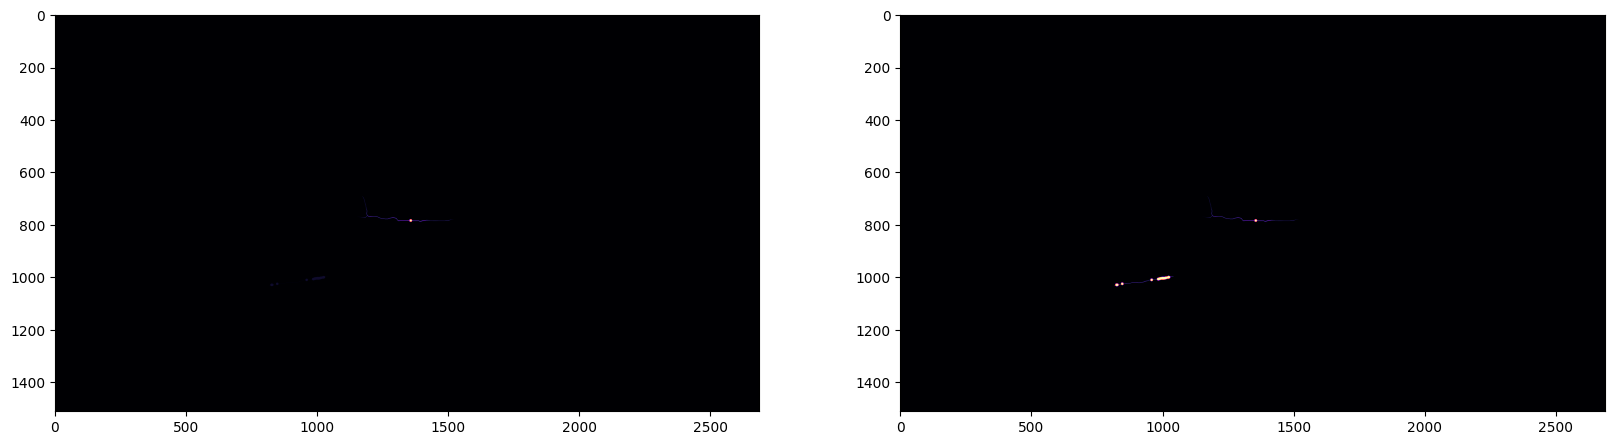

In [7]:
# all_data = cls_num_skel_all_dict[img_name][1] + cls_num_skel_all_dict[img_name][2]
# # print(np.unique(all_data))
# # 归一化显示
# print(np.min(cls_num_skel_all_dict[img_name][1]), np.max(cls_num_skel_all_dict[img_name][1]))
# print(np.min(cls_num_skel_all_dict[img_name][2]), np.max(cls_num_skel_all_dict[img_name][2]))

# print(np.min(all_data), np.max(all_data))
# all_data_norm = (all_data - np.min(all_data)) / (np.max(all_data) - np.min(all_data))
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(all_data, cmap='magma')

plt.subplot(1, 2, 2)
plt.imshow(all_data_norm, cmap='magma')
plt.show()

In [17]:
cls_num_mask_dict

{'0032': {1: [array([[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)],
  2: [array([[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]}}

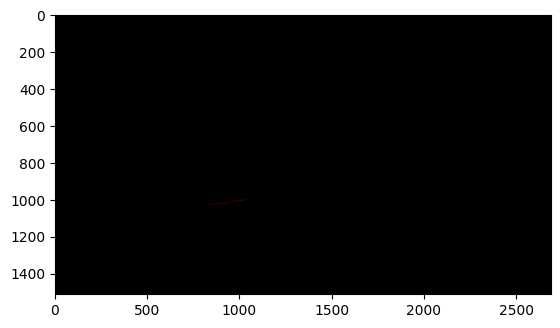

In [20]:
plt.imshow(colored_mask(cls_num_mask_dict[img_name][1][0]))
plt.show()

In [75]:
import numpy as np

# 假设这是两个 NumPy 数组形式的 mask
mask1 = np.array([[0, 1, 0], [0, 1, 0], [0, 0, 0]], dtype=np.uint8)
mask2 = np.array([[0, 0, 1], [0, 1, 1], [0, 0, 0]], dtype=np.uint8)

# 使用逻辑与操作获取相交区域
intersection = np.logical_and(mask1, mask2).astype(np.uint8)

print("相交区域：")
print(intersection)
len(np.unique(intersection))

相交区域：
[[0 0 0]
 [0 1 0]
 [0 0 0]]


2

## 用此

(448, 448) <class 'numpy.ndarray'> [  0   1   2   3   4   5   6   7 248 249 250 251 252 253 254 255]
(448, 448) <class 'numpy.ndarray'> [False  True]
L (448, 448) None
P [  0  61  87 123 138 174 185 195 222 255]
np.unique(dist_on_skel_lee_pil_mode_p): [  0  61  87 123 138 174 185 195 222 255]
max dist_on_skel_lee: 8.246211251235321  pixels
max_dist_on_skel_lee_index: (250, 36)
np.max(np.array(dist_on_skel_lee_pil_mode_p)) 255
distance.shape: (448, 448)
skel.shape: (448, 448)


C:\Users\1\AppData\Local\Temp\ipykernel_29416\2282629183.py:279: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


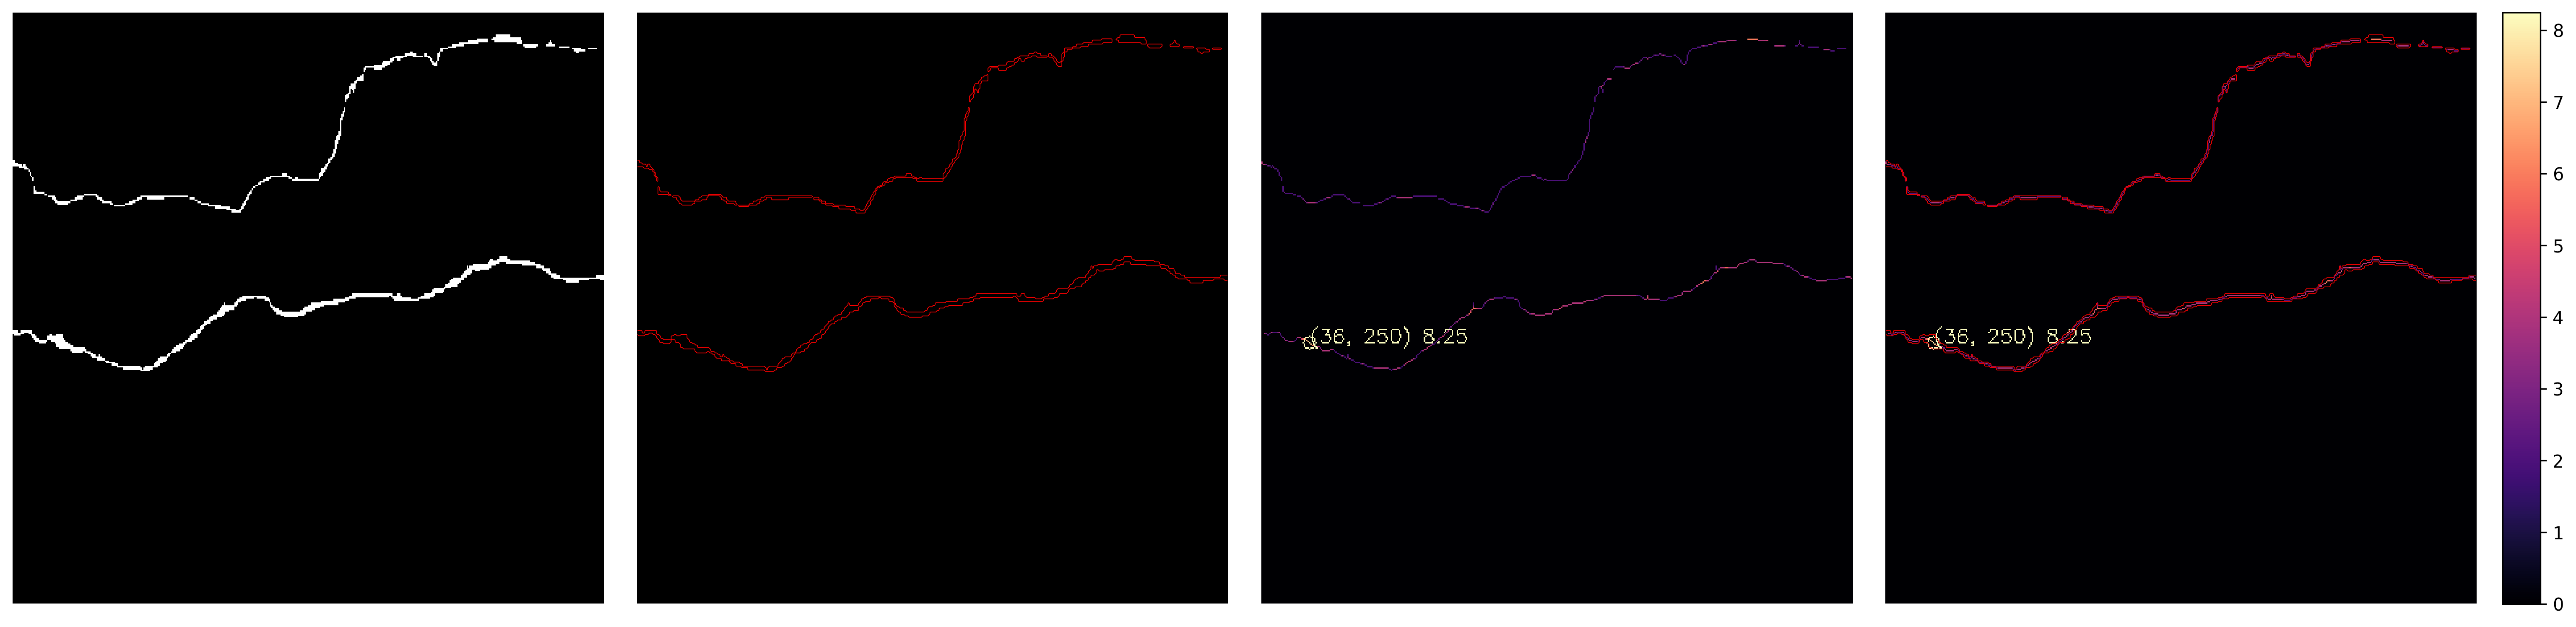

In [9]:
# 保存单个pil图片处理流程：

from skimage.morphology import medial_axis, skeletonize
from skimage import data
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
# import io
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

output_dir = 'output'
output_show_dir = f'{output_dir}/show'
output_projection_dir = f'{output_dir}/projection'
os.makedirs(f'{output_show_dir}', exist_ok=True)
os.makedirs(f'{output_projection_dir}', exist_ok=True)

def generate_gradient_palette_red(colors):
    palette = []
    for i in range(256):
        r = int((colors[0] * i) / 255)
        g = int((colors[1] * i) / 255)
        b = int((colors[2] * i) / 255)
        palette.extend([r, g, b])
    return bytes(palette)

gradient_palette_red = generate_gradient_palette_red((255, 0, 0))


def generate_gradient_palette(colors):
    palette = []
    for i in range(256):
        r = int((colors[0] * i) / 255)
        g = int((colors[1] * i) / 255)
        b = int((colors[2] * i) / 255)
        palette.extend([r, g, b])
    return bytes(palette)

# 生成一个从黑色到红色的渐变调色板
# gradient_palette = generate_gradient_palette((255, 0, 0))
# gradient_palette = generate_gradient_palette((255, 0, 0))


def generate_gradient_palette_new(start_color, end_color):
    palette = []
    for i in range(256):
        # 计算插值比例 (0.0 ~ 1.0)
        t = i / 255.0
        
        # 对每个颜色通道进行线性插值
        r = int(round(start_color[0] * (1 - t) + end_color[0] * t))
        g = int(round(start_color[1] * (1 - t) + end_color[1] * t))
        b = int(round(start_color[2] * (1 - t) + end_color[2] * t))
        
        palette.extend([r, g, b])
    
    return bytes(palette)

# 使用示例：黄色到紫色渐变
black = (0, 0, 0)    # 黑色背景
yellow = (255, 255, 0)    # 标准黄色
dark_yellow = (128, 128, 0)    # 深黄色
slight_yellow = (192, 192, 0)    # 轻黄色
purple = (255, 0, 255)    # 标准紫色
dark_purple = (128, 0, 128)    # 深紫色
red = (255, 0, 0)    # 标准红色
dark_red = (128, 0, 0)    # 深红色

gradient_palette_new = generate_gradient_palette_new(black, purple)



def generate_gradient_palette_new_black_bg(start_color, end_color):
    palette = [0, 0, 0]
    for i in range(1,256):
        # 计算插值比例 (0.0 ~ 1.0)
        t = i / 255.0
        
        # 对每个颜色通道进行线性插值
        r = int(round(start_color[0] * (1 - t) + end_color[0] * t))
        g = int(round(start_color[1] * (1 - t) + end_color[1] * t))
        b = int(round(start_color[2] * (1 - t) + end_color[2] * t))
        
        palette.extend([r, g, b])
    
    return bytes(palette)
# gradient_palette_new_black_bg = generate_gradient_palette_new_black_bg(slight_yellow, purple)
gradient_palette_new_black_bg = generate_gradient_palette_new_black_bg(dark_purple, dark_yellow)

def generate_magma_palette_np_array():
    color_stops = np.array([
        [0.0, 0, 0, 0],
        [0.25, 47, 15, 122],
        [0.5, 138, 23, 107],
        [0.75, 220, 95, 50],
        [1.0, 252, 246, 155]
    ])
    
    t = np.linspace(0, 1, 256)
    palette = np.zeros((256, 3), dtype=np.uint8)
    
    # 分段插值
    for j in range(len(color_stops)-1):
        mask = (t >= color_stops[j, 0]) & (t <= color_stops[j+1, 0])
        segment_t = (t[mask] - color_stops[j, 0]) / (color_stops[j+1, 0] - color_stops[j, 0])
        interp = color_stops[j, 1:][None, :] * (1 - segment_t[:, None]) + color_stops[j+1, 1:][None, :] * segment_t[:, None]
        palette[mask] = np.round(interp).astype(np.uint8)
    
    return bytes(palette.flatten())

gradient_palette_magma = generate_magma_palette_np_array()



#####################################################################################################
def save_subfig(fig,ax,fig_name,save_path='./'):
    bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(1.0, 1.0)
    # bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(0, 0)
    extent = bbox.transformed(fig.dpi_scale_trans.inverted())
    # print(type(extent), extent)
    fig.savefig(save_path+fig_name, bbox_inches=extent)
        
# 原文链接：https://blog.csdn.net/qq_39645262/article/details/127190982
####################################################################################################
img_name = 'CFD_044'
path =rf"D:\project\datasets\0-crack\crack_segmentation_dataset\masks\{img_name}.jpg"
# path  = rf"D:\project\code\tool_use-main\crack.png"

# image = io.imread(path, as_gray=True)
image = Image.open(path, mode='r')
image_np = np.array(image)
print(image_np.shape, type(image_np), np.unique(image_np))
image = image.convert('1')
blobs= np.array(image)

h, w = image_np.shape

# Generate the data
# blobs = data.binary_blobs(200, blob_size_fraction=.2,
#                           volume_fraction=.35, seed=2)
print(blobs.shape, type(blobs), np.unique(blobs))   
# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)


# Compare with other skeletonization algorithms
# skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')
skeleton_lee_pil = Image.fromarray(skeleton_lee)
print(skeleton_lee_pil.mode, skeleton_lee_pil.size, skeleton_lee_pil.format)
# 修改skeleton_lee_pil的色彩为红色
# skeleton_lee_pil = skeleton_lee_pil.convert('RGB')
skeleton_lee_pil.putpalette(gradient_palette_red)
# skeleton_lee_pil.putpalette(bytes([255, 0, 0]))
skeleton_lee_pil.save(os.path.join(output_projection_dir, f'{img_name}_skeletonize_lee_pil_for_projection_red.png'))
# skeleton_zhang = skeletonize(blobs, method='zhang')
# print(skeleton_lee.shape)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel *2
dist_on_skel_lee = (distance * skeleton_lee / 255) * 2
dist_on_skel_lee_norm = dist_on_skel_lee / np.max(dist_on_skel_lee) * 255
dist_on_skel_lee_pil = Image.fromarray(dist_on_skel_lee_norm)
dist_on_skel_lee_pil_mode_p = dist_on_skel_lee_pil.convert('P')
print(dist_on_skel_lee_pil_mode_p.mode, np.unique(dist_on_skel_lee_pil_mode_p))#, dist_on_skel_lee_pil.size, dist_on_skel_lee_pil.format)
# dist_on_skel_lee_pil_mode_p.putpalette(gradient_palette_new)
# dist_on_skel_lee_pil_mode_p.putpalette(gradient_palette_new_black_bg)
dist_on_skel_lee_pil_mode_p.putpalette(gradient_palette_magma)
print('np.unique(dist_on_skel_lee_pil_mode_p):', np.unique(dist_on_skel_lee_pil_mode_p))
dist_on_skel_lee_pil_mode_p.save(os.path.join(output_projection_dir, f'{img_name}_dist_on_skel_lee_pil_for_projection_magma.png'))
# dist_on_skel_zhang = distance * skeleton_zhang * 2


# print('max dist_on_skel:', np.max(dist_on_skel), ' pixels')
print('max dist_on_skel_lee:', np.max(dist_on_skel_lee), ' pixels')
# print('max dist_on_skel_zhang:', np.max(dist_on_skel_zhang), ' pixels')
dist_on_skel_lee_only_skel = dist_on_skel_lee.copy()
# 找到dist_on_skel_lee中最大值对应的坐标
max_dist_on_skel_lee = np.max(dist_on_skel_lee)
max_dist_on_skel_lee_index = np.where(dist_on_skel_lee == max_dist_on_skel_lee)
print('max_dist_on_skel_lee_index:', (int(max_dist_on_skel_lee_index[0]), int(max_dist_on_skel_lee_index[1])))
# 在dist_on_skel_lee上画出最大值对应的坐标，用圆形标记
# dist_on_skel_lee = np.zeros_like(dist_on_skel_lee)
dist_on_skel_lee = cv2.circle(dist_on_skel_lee, (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), 5, (np.max(dist_on_skel_lee), 0, 0), 1)
# 在dist_on_skel_lee上标记坐标值
dist_on_skel_lee = cv2.putText(dist_on_skel_lee, str((int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0]))) + ' ' +str(round(max_dist_on_skel_lee, 2)), (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (np.max(dist_on_skel_lee), 0, 0), 1, cv2.LINE_AA)
# dist_on_skel_lee[max_dist_on_skel_lee_index] = 1


# 在dist_on_skel_lee_pil_mode_p绘制最大值对应的坐标
dist_on_skel_lee_pil_mode_p_mode_rgb = dist_on_skel_lee_pil_mode_p.convert('RGB')
print('np.max(np.array(dist_on_skel_lee_pil_mode_p))',np.max(np.array(dist_on_skel_lee_pil_mode_p)))
dist_on_skel_lee_pil_mode_p_np = cv2.circle(np.array(dist_on_skel_lee_pil_mode_p_mode_rgb), (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), 5, (255, 255, 0), 1)
# 在dist_on_skel_lee_pil_mode_p上标记坐标值
dist_on_skel_lee_pil_mode_p_np = cv2.putText(dist_on_skel_lee_pil_mode_p_np, str((int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0]))) + ' ' +str(round(max_dist_on_skel_lee, 2)), (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
dist_on_skel_lee_pil_mode_p_np[max_dist_on_skel_lee_index] = 1

# 保存dist_on_skel_lee_pil_mode_p
dist_on_skel_lee_pil_mode_p_img = Image.fromarray(dist_on_skel_lee_pil_mode_p_np)
dist_on_skel_lee_pil_mode_p_img.save(os.path.join(output_show_dir,f'{img_name}_dist_on_skel_lee_pil_mode_p_with_circle_text.png'))
# # max_dist_on_skel_lee保留2位小数
# max_dist_on_skel_lee = round(max_dist_on_skel_lee, 2)

print('distance.shape:', distance.shape)
print('skel.shape:', skel.shape)
# print('dist_on_skel.shape:', dist_on_skel.shape)


dist_on_skel_lee_new2 = dist_on_skel_lee.copy()

dist_on_skel_lee_new2 = cv2.circle(dist_on_skel_lee_new2, (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), 5, (np.max(dist_on_skel_lee), 0, 0), 1)
# 在dist_on_skel_lee上标记坐标值
dist_on_skel_lee_new2 = cv2.putText(dist_on_skel_lee_new2, str((int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0]))) + ' ' +str(round(max_dist_on_skel_lee, 2)), (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (np.max(dist_on_skel_lee), 0, 0), 1, cv2.LINE_AA)

##############################  画图  ########################################################################
# vmin = 0
# vmax = 20
# norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
# fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True, sharey=True, dpi=300)
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True, dpi=300)
# fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, dpi=300)
# fig, axes = plt.subplots(3, 2, sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
# ax[0].set_title('original')
ax[0].axis('off')

black_bg_np = np.zeros_like(blobs)
dist_on_skel_cax1 = ax[1].imshow(black_bg_np, cmap=plt.cm.gray)
# dist_on_skel_cax1 = ax[1].imshow(dist_on_skel_lee_only_skel, cmap='magma')
# fig.colorbar(dist_on_skel_cax1, ax=ax[1])
ax[1].contour(blobs, [0.5], colors='r', linewidths=0.4) # 0.5 is the threshold
# ax[1].contour(blobs, [0.5], colors='w', linewidths=1.0)
# ax[1].set_title('skeleton and boarder')
ax[1].axis('off')

dist_on_skel_lee_new = dist_on_skel_lee.copy()
dist_on_skel_cax2 = ax[2].imshow(dist_on_skel_lee_new, cmap='magma')

#colorbar 左 下 宽 高 (适用于不使用fig.tight_layout())
# l = 1
# b = 0.15
# w = 0.015
# h = 1 - 2.0*b 
#colorbar 左 下 宽 高 (适用于使用fig.tight_layout())
l = 1
b = 0.03
w = 0.015
h = 1.0 - 2.0*b 

#对应 l,b,w,h；设置colorbar位置；
rect = [l,b,w,h] 
cbar_ax = fig.add_axes(rect) 
fig.colorbar(dist_on_skel_cax2, cax=cbar_ax)

# fig.colorbar(dist_on_skel_cax2, ax=ax[2])
# fig.colorbar(dist_on_skel_cax3, ax=ax[1])
# ax[1].set_title("skeletonize (Lee 94)")
ax[2].axis('off')


# dist_on_skel_lee[max_dist_on_skel_lee_index] = 1
dist_on_skel_cax3 = ax[3].imshow(dist_on_skel_lee_new2, cmap='magma')
blobs_new = blobs.copy()
ax[3].contour(blobs_new, [0.5], colors='r', linewidths=0.4) # 0.5 is the threshold

# divider = make_axes_locatable(ax[3])
# cax3 = divider.append_axes("right", size="5%", pad=0.1)

# ax[2].imshow()
ax[3].axis('off')

# ax[3].axis('off')
# ax[4].axis('off')
# ax[5].axis('off')

fig.tight_layout()

plt.show()
fig.savefig(os.path.join(output_show_dir,f'show_{img_name}_all.png'), bbox_inches = 'tight')

# save_subfig(fig, ax[1], os.path.join(output_show_dir, f'show_{img_name}_medial_axis.png'))
# save_subfig(fig, ax[2], os.path.join(output_show_dir,f'show_{img_name}_skeletonize_lee.png'))
# save_subfig(fig, ax[3], os.path.join(output_show_dir,f'show_{img_name}_dist_on_skel_lee_with_circle_text.png'))


In [8]:
skeleton_dir = rf"D:\project\code\tool_use-main\分割任务的（裂缝，腐蚀等）尺寸宽度等测量\output\projection\CFD_044_skeletonize_lee_pil_for_projection_red.png"
skeleton_pil = Image.open(skeleton_dir)
skeleton_np = np.array(skeleton_pil)
print(np.unique(skeleton_np), skeleton_np.shape)

dist_skeleton_dir = rf"D:\project\code\tool_use-main\分割任务的（裂缝，腐蚀等）尺寸宽度等测量\output\projection\CFD_044_dist_on_skel_lee_pil_for_projection_magma.png"
dist_skeleton_pil = Image.open(dist_skeleton_dir)
dist_skeleton_np = np.array(dist_skeleton_pil)
print(np.unique(dist_skeleton_np), dist_skeleton_np.shape)

[  0 255] (448, 448)
[  0  61  87 123 138 174 185 195 222 255] (448, 448)


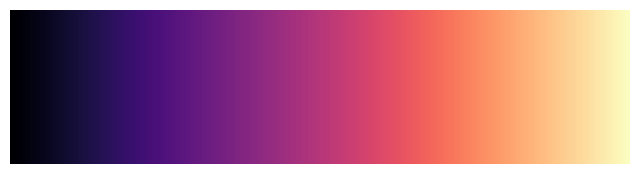

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# 生成256个均匀分布的点
gradient = np.linspace(0, 1, 256).reshape(1, -1)

# 绘制magma调色板
plt.figure(figsize=(8, 2))
plt.imshow(gradient, aspect='auto', cmap='magma')
plt.axis('off')
plt.show()

In [7]:
def generate_gradient_palette(colors):
    palette = []
    for i in range(256):
        r = int((colors[0] * i) / 255)
        g = int((colors[1] * i) / 255)
        b = int((colors[2] * i) / 255)
        palette.extend([r, g, b])
    return bytes(palette)

# 生成一个从黑色到红色的渐变调色板
gradient_palette = generate_gradient_palette((255, 0, 0))

# 创建索引图像并应用调色板
image = Image.new('P', (256, 256))
image.putdata(list(range(256)))
image.putpalette(gradient_palette)
image.save('gradient_palette.png')
image.show()

448 448 <class 'int'>
(448, 448) <class 'numpy.ndarray'> [False  True]
max dist_on_skel_lee: 8.246211251235321  pixels
max_dist_on_skel_lee_index: (250, 36)
distance.shape: (448, 448)
skel.shape: (448, 448)
dist_on_skel.shape: (448, 448)


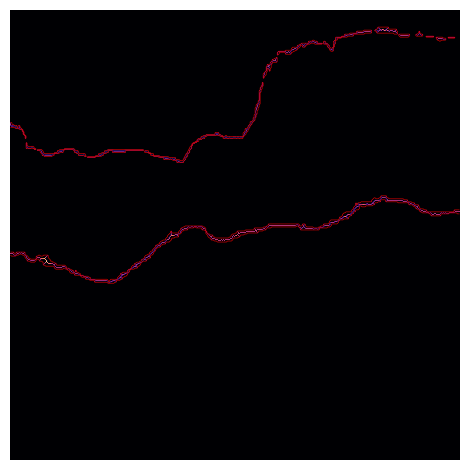

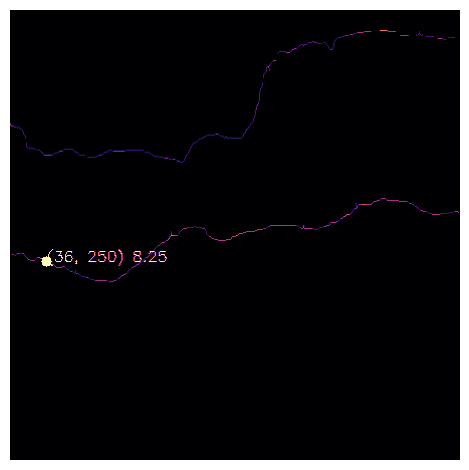

In [111]:
from skimage.morphology import medial_axis, skeletonize
from skimage import data
import matplotlib.pyplot as plt
from PIL import Image
import cv2


# 用于单独保存子图的函数
def save_subfig(fig,ax,fig_name,save_path='./'):
    bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(1.0, 1.0)
    # bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(0, 0)
    extent = bbox.transformed(fig.dpi_scale_trans.inverted())
    print(type(extent), extent)
    fig.savefig(save_path+fig_name, bbox_inches=extent)
        
# 原文链接：https://blog.csdn.net/qq_39645262/article/details/127190982



# 用于单独保存子图的函数
def save_subfig_org_resolution(fig,ax,fig_name,h, w, save_path='./'):
    bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(1.0, 1.0)
    # bbox = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(0, 0)
    extent = bbox.transformed(fig.dpi_scale_trans.inverted())

    fig.savefig(save_path+fig_name, bbox_inches=extent)


img_name = 'CFD_044'
path =rf"D:\project\datasets\0-crack\crack_segmentation_dataset\masks\{img_name}.jpg"
# path  = rf"D:\project\code\tool_use-main\crack.png"

# image = io.imread(path, as_gray=True)
image = Image.open(path, mode='r')
image_np = np.array(image)
image = image.convert('1')
blobs= np.array(image)

h,w = blobs.shape
print(h,w, type(h))

# Generate the data
# blobs = data.binary_blobs(200, blob_size_fraction=.2,
#                           volume_fraction=.35, seed=2)
print(blobs.shape, type(blobs), np.unique(blobs))   
# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
# skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')
# skeleton_zhang = skeletonize(blobs, method='zhang')
# print(skeleton_lee.shape)

# Distance to the background for pixels of the skeleton
# dist_on_skel = distance * skel *2
dist_on_skel_lee = (distance * skeleton_lee / 255) * 2
# print(np.unique(dist_on_skel_lee))
# dist_on_skel_lee_norm_int = (distance * skeleton_lee / np.max(distance) * 255).astype(np.uint8)
# dist_on_skel_zhang = distance * skeleton_zhang * 2


# print('max dist_on_skel:', np.max(dist_on_skel), ' pixels')
print('max dist_on_skel_lee:', np.max(dist_on_skel_lee), ' pixels')
# print('max dist_on_skel_zhang:', np.max(dist_on_skel_zhang), ' pixels')

# 找到dist_on_skel_lee中最大值对应的坐标
max_dist_on_skel_lee = np.max(dist_on_skel_lee)
max_dist_on_skel_lee_index = np.where(dist_on_skel_lee == max_dist_on_skel_lee)
print('max_dist_on_skel_lee_index:', (int(max_dist_on_skel_lee_index[0]), int(max_dist_on_skel_lee_index[1])))
# 在dist_on_skel_lee上画出最大值对应的坐标，用圆形标记
# dist_on_skel_lee = np.zeros_like(dist_on_skel_lee)
dist_on_skel_lee_circle = cv2.circle(dist_on_skel_lee, (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), 5, (np.max(dist_on_skel_lee), 0, 0), -1)
# 在dist_on_skel_lee上标记坐标值
dist_on_skel_lee_text = cv2.putText(dist_on_skel_lee_circle, str((int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0]))) + ' ' +str(round(max_dist_on_skel_lee, 2)), (int(max_dist_on_skel_lee_index[1]), int(max_dist_on_skel_lee_index[0])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (np.max(dist_on_skel_lee), 0, 0), 1, cv2.LINE_AA)
# dist_on_skel_lee[max_dist_on_skel_lee_index] = 1

# # max_dist_on_skel_lee保留2位小数
# max_dist_on_skel_lee = round(max_dist_on_skel_lee, 2)

print('distance.shape:', distance.shape)
print('skel.shape:', skel.shape)
print('dist_on_skel.shape:', dist_on_skel.shape)

# fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True, dpi=500)
# ax = axes.ravel()

# ax[0].imshow(blobs, cmap=plt.cm.gray)
# ax[0].set_title('original')
# ax[0].axis('off')

fig, axes = plt.subplots(1,1)
dist_on_skel_cax1 = axes.imshow(dist_on_skel, cmap='magma')
# plt.colorbar(dist_on_skel_cax1)
axes.contour(blobs, [0.5], colors='r', linewidths=0.4) # 0.5 is the threshold
axes.axis('off')
# 无空白区域
fig.tight_layout(h_pad=0.0, w_pad=0.0)
fig.savefig(f'{img_name}_dist_on_skel.png')

# ax[1].contour(blobs, [0.5], colors='w', linewidths=1.0)
# ax[1].set_title('medial_axis')
# ax[1].axis('off')

# ax[2].imshow(skeleton, cmap=plt.cm.gray)
# plt.imshow(dist_on_skel, cmap='magma')
# plt.colorbar(dist_on_skel_cax2, ax=ax[2])
# # ax[2].set_title('skeletonize')
# plt.axis('off')

# ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
fig1, ax1 = plt.subplots(1,1)
ax1.imshow(dist_on_skel_lee_text, cmap='magma')
ax1.axis('off')
fig1.tight_layout(h_pad=0.0, w_pad=0.0)
fig1.savefig(f'{img_name}_dist_on_skel_lee.png')
# fig.colorbar(dist_on_skel_cax3, ax=ax[3])
# ax[3].set_title("skeletonize (Lee 94)")
# ax[3].axis('off')

# ax[4].imshow(skeleton_zhang, cmap=plt.cm.gray)
# dist_on_skel_cax4 = ax[4].imshow(dist_on_skel_zhang, cmap='magma')
# fig.colorbar(dist_on_skel_cax4, ax=ax[4])
# ax[4].set_title("skeletonize (Zhang-Suen)")
# ax[4].axis('off')

# # ax[5].imshow(image_np, cmap='gray')
# # ax[5].set_title('original')
# ax[5].axis('off')

# fig.tight_layout()
# fig.savefig(f'skeletonization_{img_name}.png')
# plt.show()


# # 提取blobs的skeleton，并保存为png文件
# skeleton_lee_pil = Image.fromarray(skeleton_lee)
# skeleton_lee_pil.save(f'{img_name}_skeleton_lee.png')

# print(np.unique(dist_on_skel_lee_norm_int))
# skeleton_lee_with_dist_pil = Image.fromarray(dist_on_skel_lee_norm_int)
# # 将skeleton_lee_with_dist_pil按照cmap='magma'的颜色映射保存为png文件
# skeleton_lee_with_dist_pil.save(f'{img_name}_skeleton_lee_with_dist.png')

# # 提取blobs的contour，并保存为png文件

# save_subfig(fig, ax[1], f'skeletonization_{img_name}_medial_axis.png')

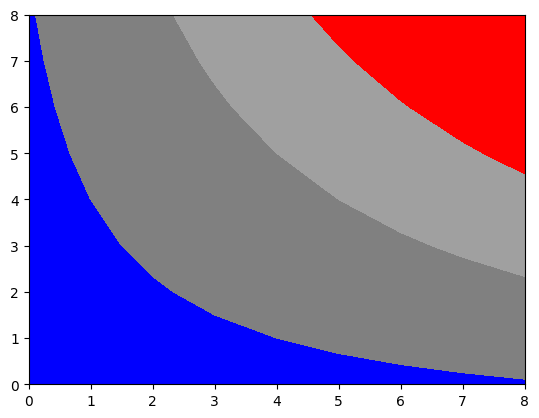

In [21]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()